# Exercice 1

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

## Question 1.a
On va considérer des arrays 2D pour représenter la matrice d'adjacence. Ainsi pour un graph à N noeuds, la matrice d'adjacence sera de taille NxN, et chaque valeur à la coordonnée (x,y) représente le nombre d'arêtes entre les noeuds x et y. Les graphes étant non orientés; cette matrice est donc symétrique.
Voici un éxemple de définition suivant cette structure :
```
                 # x1 x2 x3 x4 x5 x6
                 
Graph = np.array([[0, 1, 0, 0, 0, 0],     # y1
                  [1, 0, 1, 0, 1, 0],     # y2
                  [0, 1, 0, 1, 1, 0],     # y3
                  [0, 0, 1, 0, 0, 1],     # y4
                  [0, 1, 1, 0, 0, 1],     # y5
                  [0, 0, 0, 1, 1, 0]])    # y6
```

Pour effectuer la constraction de deux sommets, on va considerer que l'on en isole un (par exmple y) et on ajoute tous les liens du noeud isolé au noeud restant (par exemple x).

In [79]:
def contraction(G, e):
    # récupération des indice des deux sommets à fusionner
    x,y = e
        
    # récupération du nombre d'arêtes entre y et chaque autre sommet
    fus_l = G[y,:]

    # on met à jour le sommet x en ajoutant les relations de y
    G[x,:] += fus_l
    G[:,x] += fus_l
    
    # on ne considère pas les arête auto-référentes
    G[x,x] = 0
    
    # on "isole" le sommet y en mettant ses lignes et colonnes correspondantes à 0
    G[y,:] = np.zeros(len(G))
    G[:,y] = np.zeros(len(G))
    
    # on renvoie le nouveau graph ainsi que le sommet isolé
    return G, y


## Question 1.b

### Graphes Complets

In [75]:
tps_complet = []
N = [10,20,50,100,250,500,1000,2000]

for n in N:
    tps_N = []
    # tirage aléatoire de 2 sommets à fusionner
    # toutes les instances de graph pour ce n fusionnerons les deux mêmes sommets
    e = (np.random.randint(n),np.random.randint(n))
    
    for i in range(1000):
        # création de la matrice d'un graph complet de taille n
        G = np.ones((n,n))
        G = G - np.eye(n)
        
        # Calcul du temps d'execution
        debut = time.time()
        G, y = contraction(G,e)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_complet.append(np.mean(tps_N))


### Graphes à Cycles

In [76]:
tps_cycle = []
N = [10,20,50,100,250,500,1000,2000]

for n in N:
    tps_N = []
    # tirage aléatoire de 2 sommets à fusionner
    # toutes les instances de graph pour ce n fusionnerons les deux mêmes sommets
    e = (np.random.randint(n),np.random.randint(n))
    
    for i in range(1000):
        # création de la matrice d'un graph à cycle de taille n
        G = np.zeros((n,n))
        np.fill_diagonal(G[:,1:], 1)
        G[-1,0] = 1
        
        # Calcul du temps d'execution
        debut = time.time()
        G, y = contraction(G,e)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_cycle.append(np.mean(tps_N))


### Graphes construits par Proba

In [77]:
tps_proba = []
N = [10,20,50,100,250,500,1000,2000]

for n in N:
    tps_N = []
    # tirage aléatoire de 2 sommets à fusionner
    # toutes les instances de graph pour ce n fusionnerons les deux mêmes sommets
    e = (np.random.randint(n),np.random.randint(n))
    
    for i in range(1000):
        # création de la matrice du graph aléatoire
        G = np.random.randint(2, size = (n,n))
        
        # Calcul du temps d'execution
        debut = time.time()
        G, y = contraction(G,e)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_proba.append(np.mean(tps_N))


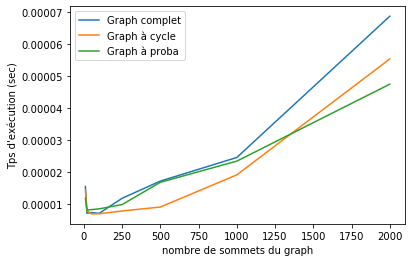

In [78]:
# Visualisation plus pratique
plt.figure()
plt.xlabel('nombre de sommets du graph')
plt.ylabel('Tps d\'exécution (sec)')
plt.plot(N, tps_complet, label='Graph complet')
plt.plot(N, tps_cycle, label='Graph à cycle')
plt.plot(N, tps_proba, label='Graph à proba')
plt.legend()
plt.show()

## Question 1.c

Nous cherchons tirer aléatoirement une arête parmi toutes celles existance dans notre graphe. Une idée pour nous permettre de le faire serait de définir les probabilités de tirer un sommet précis en connaissant le nombre d'arête relié à chacun. Nous pourrions ainsi pondérer la probabilité de tirer un couple de sommet.

Nous allons pour cela sommer sur les lignes (ou les colonnes) les valeurs de la matrice d'adjacence. Nous avons ainsi un vecteur stockant le nombre d'arêtes partant de chaque sommet. Pour obtenir une probabilité, nous devons normaliser en divisant par la somme du nombre d'arêtes, divisée par deux (graph non orienté).

Le graphe étant non orienté et la matrice d'adjacence étant symétrique, l'axe sur lequel nous effectuons l'opération n'a pas de réelle importance.

In [158]:
def selectRandom(G):
    n = len(G)
    # calcul de la proba de choisir un arc relié à un certain sommet
    proba = ( np.sum(G, axis = 0)/(np.sum(G)) ).tolist()
    
    # tirage aléatoire
    x = np.random.choice(n, p=proba)
    y = np.random.choice(n, p=proba)
    
    # on continue de tier si jamais on a tirer un couple de sommet non reliés
    while (G[x,y]==0):
        x = np.random.choice(n, p=proba)
        y = np.random.choice(n, p=proba)
                
    return x,y

In [159]:
def karger(G):
    V = [*range(len(G))]
    S = []
    
    while len(V) > 2:
        e = selectRandom(G)
        
        G ,y = contraction(G,e)
        
        V.remove(y)
        S.append(y)
        
    return S
    

In [160]:
G1 = np.array([[0,1,0,0,0,0],
               [1,0,1,0,1,0],
               [0,1,0,1,1,0],
               [0,0,1,0,0,1],
               [0,1,1,0,0,1],
               [0,0,0,1,1,0]])

print(G1)
print(karger(G1))

[[0 1 0 0 0 0]
 [1 0 1 0 1 0]
 [0 1 0 1 1 0]
 [0 0 1 0 0 1]
 [0 1 1 0 0 1]
 [0 0 0 1 1 0]]
[5, 1, 3, 4]


In [10]:
# 1.e
# Dictionnaire {"Key :[sommet]" : "successeur :[(sommet, nb d'arêtes)]"}

#n1 = {[1], "succ": [{n2, 1}]}
g = {'1' : [(2, 1)],
    '2' : [(1,1), (3,1), (5,1)],
    '3' : [(2,1), (4,1), (5,1)],
    '4' : [(3,1), (6,1)],
    '5' : [(2,1), (3,1), (6,1)],
    '6' : [(4,1), (5,1)]}

print(g['1'])



[(2, 1)]


In [11]:
def contraction_2(G, e):
        
    # récupération des indice des deux sommets à fusionner
    x,y = e
        
    # récupération du nombre d'arête entre y et chaque autre sommet
    Gx = G[str(x)]
    Gy = G[str(y)]

    G_new = Gx
    for elm in Gy:
        if elm not in G_new:
            G_new.append(elm)
        else:
            G_new[elm][1] +=1
            
    G_new.remove()

    
    return G, y

In [104]:
np.random.choice(len(G1), p = [0.1,0.1,0.2,0.1,0.2,0.3])

5

6